In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> IMDb Movie Analysis </font>

We have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this project, let us try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [2]:
# Read the csv file using 'read_csv'. 

movies_inp = pd.read_csv("Movie+Assignment+Data.csv")
movies_inp.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [3]:
# Check the number of rows and columns in the dataframe
#There are 100 rows and 62 columns present in the dataset

movies_inp.shape

(100, 62)

In [4]:
# Check the column-wise info of the dataframe

movies_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
Title                     100 non-null object
title_year                100 non-null int64
budget                    100 non-null int64
Gross                     100 non-null int64
actor_1_name              100 non-null object
actor_2_name              100 non-null object
actor_3_name              100 non-null object
actor_1_facebook_likes    100 non-null int64
actor_2_facebook_likes    99 non-null float64
actor_3_facebook_likes    98 non-null float64
IMDb_rating               100 non-null float64
genre_1                   100 non-null object
genre_2                   97 non-null object
genre_3                   74 non-null object
MetaCritic                95 non-null float64
Runtime                   100 non-null int64
CVotes10                  100 non-null int64
CVotes09                  100 non-null int64
CVotes08                  100 non-null int64
CVotes07                  100 n

In [5]:
# Check the summary for the numeric columns 

movies_inp.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [6]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

movies_inp.budget = movies_inp.budget.floordiv(1000000)  #Converting Budget to millions
movies_inp.Gross = movies_inp.Gross.floordiv(1000000) #Converting Gross to millions

In [7]:
movies_inp.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30,151,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150,341,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12,51,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47,100,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9,47,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Let us create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [8]:
# 1. Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column
# taking a difference of Gross and budget and storing the result in profit

movies_inp['profit'] = movies_inp.Gross-movies_inp.budget 

In [9]:
# 2. Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. 
# Make sure to set the argument'ascending' to 'False'

movies_inp.sort_values('profit',ascending=False, inplace=True)

In [10]:
movies_inp.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691
11,The Avengers,2012,220,623,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403
47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305
32,The Hunger Games: Catching Fire,2013,130,424,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294
12,Toy Story 3,2010,200,414,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214


In [11]:
# 3. Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9), store in a new variable
top10_movies = movies_inp.iloc[:10]
top10_movies

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691
11,The Avengers,2012,220,623,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403
47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305
32,The Hunger Games: Catching Fire,2013,130,424,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294
12,Toy Story 3,2010,200,414,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214
8,The Dark Knight Rises,2012,250,448,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198
45,The Lego Movie,2014,60,257,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197
1,Zootopia,2016,150,341,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191
41,Despicable Me,2010,69,251,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182
18,Inside Out,2015,175,356,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181


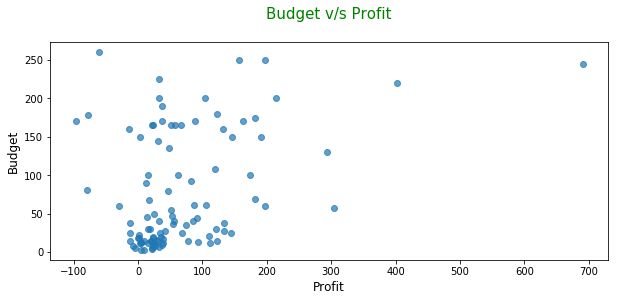

In [12]:
# 4. Plot a scatter plot of budget VS profit

plt.figure(figsize=(10,4))
plt.title("Budget v/s Profit\n", fontdict={'fontsize':15, 'fontweight':5, 'color':'Green'})
plt.scatter(movies_inp.profit,movies_inp.budget, alpha=0.7)
plt.xlabel('Profit',fontdict={'fontsize':12})
plt.ylabel('Budget',fontdict={'fontsize':12})
plt.show()

<span style="color:Blue">**Observations from the above scatter plot:**</span>


1. There is a slight upwards or positive pattern that implies as the budget increses, profit made also increases


2. There are extremely high budget movies that have made significant loss.


3. A cluster can be observed between the range of 0-100 indicating that most  of the movies had a budget of 100 Million or less


4. While we can see that a few movies are in a negative profit range, majority of the movies have made a profit ranging in between 0-200 Million 



The dataset contains the 100 best performing movies from the year 2010 to 2016. However, the scatter plot tells a different story. We can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [13]:
#Find the movies with negative profit

neg_profit=movies_inp[movies_inp.profit<0]
neg_profit.Title

99        Tucker and Dale vs Evil
89                          Amour
56                           Rush
66                        Warrior
82                        Flipped
28             X-Men: First Class
46    Scott Pilgrim vs. the World
7                         Tangled
17               Edge of Tomorrow
39              The Little Prince
22                           Hugo
Name: Title, dtype: object

**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

It is noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, we also have another column `IMDb_rating` which tells us the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

Now let us find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly we will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, we need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. 
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to or greater than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [14]:
movies_inp["MetaCritic"].head() #Before changing the scale of MetaCritic

97    81.0
11    69.0
47    65.0
32    76.0
12    92.0
Name: MetaCritic, dtype: float64

In [15]:
# 1. Change the scale of Meta_Critic from 100 to 10

movies_inp["MetaCritic"] = movies_inp["MetaCritic"] / 10

movies_inp["MetaCritic"].head()

97    8.1
11    6.9
47    6.5
32    7.6
12    9.2
Name: MetaCritic, dtype: float64

In [16]:
# Find the average ratings
# 2.1 Creating a new field for average ratings of MetaCritic and IMDb Ratings

movies_inp['Avg_rating']=movies_inp[['MetaCritic','IMDb_rating']].mean(axis=1) 
movies_inp

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691,8.10
11,The Avengers,2012,220,623,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403,7.50
47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305,7.25
32,The Hunger Games: Catching Fire,2013,130,424,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294,7.60
12,Toy Story 3,2010,200,414,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214,8.75
8,The Dark Knight Rises,2012,250,448,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198,8.10
45,The Lego Movie,2014,60,257,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197,8.05
1,Zootopia,2016,150,341,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191,7.95
41,Despicable Me,2010,69,251,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182,7.45
18,Inside Out,2015,175,356,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181,8.80


In [17]:
#Sort in descending order of average rating

# 2.1 & 2.2 Find the movies with metacritic-Imdb rating < 0.5 and also with an average rating of >= 8 

UniversalAcclaim = movies_inp[((movies_inp.MetaCritic-movies_inp.IMDb_rating.abs())<0.5)&(movies_inp.Avg_rating>=8)].sort_values('Avg_rating', ascending=False)


UniversalAcclaim

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
95,Whiplash,2014,3,13,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,10,8.65
35,Django Unchained,2012,100,162,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62,8.25
93,Dallas Buyers Club,2013,5,27,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22,8.20
27,Inception,2010,160,292,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.1,8.1,8.0,8.2,8.7,8.8,PG-13,USA,132,8.10
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691,8.10
8,The Dark Knight Rises,2012,250,448,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198,8.10
3,Arrival,2016,47,100,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53,8.05
33,The Martian,2015,108,228,Matt Damon,Donald Glover,Benedict Wong,13000,801.0,372.0,...,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120,8.00
43,Gone Girl,2014,61,167,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106,8.00
26,Interstellar,2014,165,187,Matthew McConaughey,Anne Hathaway,Mackenzie Foy,11000,11000.0,6000.0,...,7.9,7.9,7.7,7.9,8.4,8.5,PG-13,USA,22,8.00


In [18]:
# Star Wars is present in the above result. 

- ### Subtask 2.4: Find the Most Popular Trios - I

Scenario:
You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help us out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [19]:
# Find if there are null values in the fields

print(movies_inp["actor_1_facebook_likes"].isnull().sum())
print(movies_inp["actor_2_facebook_likes"].isnull().sum())
print(movies_inp["actor_3_facebook_likes"].isnull().sum())

0
1
2


In [20]:
# Handling NaN values in actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes with zeroes
# np.where(condition,x,y) condition if true - x else y
movies_inp.actor_1_facebook_likes=np.where(movies_inp.actor_1_facebook_likes.isnull(),0,movies_inp.actor_1_facebook_likes)
movies_inp.actor_2_facebook_likes=np.where(movies_inp.actor_2_facebook_likes.isnull(),0,movies_inp.actor_2_facebook_likes)
movies_inp.actor_3_facebook_likes=np.where(movies_inp.actor_3_facebook_likes.isnull(),0,movies_inp.actor_3_facebook_likes)

In [21]:
#Creating a total_likes field to calculate sum of likes of popular actors

movies_inp['total_likes']=movies_inp[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']].sum(axis=1)
movies_inp["total_likes"].head()

97      143.0
11    66000.0
47    17166.0
32    48523.0
12    16721.0
Name: total_likes, dtype: float64

In [22]:
top5_actors = movies_inp.sort_values(by="total_likes", ascending=False).iloc[0:5]
top5_actors

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,total_likes
2,Lion,2016,12,51,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39,7.50,138800.0
27,Inception,2010,160,292,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.1,8.0,8.2,8.7,8.8,PG-13,USA,132,8.10,79000.0
14,X-Men: Days of Future Past,2014,200,233,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,...,7.7,7.9,7.4,8.1,7.9,PG-13,USA,33,7.70,76000.0
4,Manchester by the Sea,2016,9,47,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.6,7.1,7.9,7.8,R,USA,38,8.75,74818.0
8,The Dark Knight Rises,2012,250,448,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198,8.10,73000.0


In [23]:
# Displaying top 5 popular trios in a list

top5_trios=movies_inp.groupby(['actor_1_name','actor_2_name','actor_3_name']).total_likes.sum().sort_values(ascending=False).index[:5].to_list()
top5_trios


[('Dev Patel', 'Nicole Kidman', 'Rooney Mara'),
 ('Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'),
 ('Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'),
 ('Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'),
 ('Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt')]

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above? Write your answers in the markdown cell provided below.

In [24]:
# Extra optional condition

condition_popularity = movies_inp[~((((movies_inp.actor_1_facebook_likes < movies_inp.actor_2_facebook_likes / 2 ) |
(movies_inp.actor_1_facebook_likes < movies_inp.actor_3_facebook_likes / 2 )) == True) |

(((movies_inp.actor_2_facebook_likes < movies_inp.actor_1_facebook_likes / 2 ) |
(movies_inp.actor_2_facebook_likes < movies_inp.actor_3_facebook_likes / 2 )) == True) |

(((movies_inp.actor_3_facebook_likes < movies_inp.actor_1_facebook_likes / 2 ) |
(movies_inp.actor_3_facebook_likes < movies_inp.actor_2_facebook_likes / 2 )) == True ))]


In [25]:
condition_popularity.shape

(20, 65)

In [26]:
condition_popularity["Title"]

11                  The Avengers
8          The Dark Knight Rises
9     Captain America: Civil War
61        Straight Outta Compton
27                     Inception
43                     Gone Girl
51                          Argo
44               Les MisÃ©rables
23                    Big Hero 6
14    X-Men: Days of Future Past
77                    The Artist
49                     Moneyball
25                Wreck-It Ralph
26                  Interstellar
94                       Boyhood
59                      Kick-Ass
80                    Ex Machina
87                      Nebraska
82                       Flipped
39             The Little Prince
Name: Title, dtype: object

In [27]:
#Trios satisfying the specified condition
condition_popular_actors = top5_actors[top5_actors["Title"].isin(condition_popularity["Title"])]

condition_popular_actors.loc[:,['actor_1_name','actor_2_name','actor_3_name']].values.tolist()


[['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

In [28]:
top5_condition_popularity = condition_popularity.sort_values(by="total_likes", ascending=False).iloc[0:5]
top5_condition_popularity

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,total_likes
27,Inception,2010,160,292,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,...,8.1,8.0,8.2,8.7,8.8,PG-13,USA,132,8.1,79000.0
14,X-Men: Days of Future Past,2014,200,233,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,...,7.7,7.9,7.4,8.1,7.9,PG-13,USA,33,7.7,76000.0
8,The Dark Knight Rises,2012,250,448,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198,8.1,73000.0
11,The Avengers,2012,220,623,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403,7.5,66000.0
9,Captain America: Civil War,2016,250,407,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000.0,11000.0,...,7.6,7.9,7.5,8.1,7.7,PG-13,USA,157,7.7,51000.0


In [29]:
#checking if there are any common trios between this and the previous result
top5_condition_popularity.loc[:,['actor_1_name','actor_2_name','actor_3_name']].values.tolist()

[['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt'],
 ['Chris Hemsworth', 'Robert Downey Jr.', 'Scarlett Johansson'],
 ['Robert Downey Jr.', 'Scarlett Johansson', 'Chris Evans']]

- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

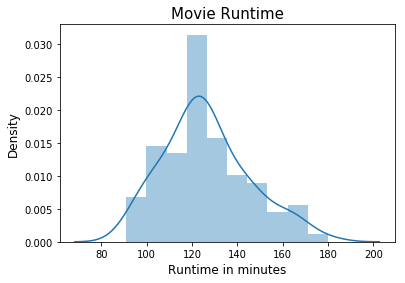

In [30]:
# Runtime histogram/density plot

sns.distplot(movies_inp.Runtime)
plt.title('Movie Runtime', fontsize=15)
plt.xlabel('Runtime in minutes', fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.show()

<span style="color:Blue">**Observation from the above density/histogram plot:**</span>

* Most of the movies fall in the range of 120-130 minutes

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [31]:
# Write your code here
popular_R_under18=movies_inp[(movies_inp.content_rating=='R') & (movies_inp.CVotesU18>0)][['Title','CVotesU18']].sort_values('CVotesU18', ascending=False).head(10)

popular_R_under18.shape


(10, 2)

In [32]:
popular_R_under18

,Title,CVotesU18
47,Deadpool,4598
36,The Wolf of Wall Street,3622
35,Django Unchained,3250
29,Mad Max: Fury Road,3159
95,Whiplash,2878
31,The Revenant,2619
40,Shutter Island,2321
43,Gone Girl,2286
65,The Grand Budapest Hotel,2083
72,Birdman or (The Unexpected Virtue of Ignorance),1891


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. we need to aggregate a few values over these 3 columns. 


In [33]:
# 1. Create the dataframe df_by_genre with the specified columns

df_by_genre=movies_inp[['genre_1','genre_2','genre_3','CVotes10','CVotes09','CVotes08','CVotes07','CVotes06',
                    'CVotes05','CVotes04','CVotes03','CVotes02','CVotes01','CVotesMale','CVotesFemale','CVotesU18',
                    'CVotesU18M','CVotesU18F','CVotes1829','CVotes1829M','CVotes1829F','CVotes3044','CVotes3044M',
                    'CVotes3044F','CVotes45A','CVotes45AM','CVotes45AF','CVotes1000','CVotesUS','CVotesnUS','VotesM',
                    'VotesF','VotesU18','VotesU18M','VotesU18F','Votes1829','Votes1829M','Votes1829F','Votes3044',
                    'Votes3044M','Votes3044F','Votes45A','Votes45AM','Votes45AF','Votes1000','VotesUS','VotesnUS']]

In [34]:
df_by_genre.head()

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
97,Action,Adventure,Fantasy,155391,161810,166378,99402,40734,18060,8751,...,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9
11,Action,Sci-Fi,NaN,260257,234203,264290,162604,67579,27957,12176,...,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9
47,Action,Adventure,Comedy,147467,147966,170810,105717,41811,15510,7046,...,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9
32,Action,Adventure,Mystery,85219,83874,150153,121748,50575,18571,7591,...,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4
12,Animation,Adventure,Comedy,139773,149992,158704,88289,31291,11850,4859,...,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3


In [35]:
# 2. Create a column cnt and initialize it to 1

df_by_genre['cnt']=1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
df_by_genre.head()

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
97,Action,Adventure,Fantasy,155391,161810,166378,99402,40734,18060,8751,...,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,1
11,Action,Sci-Fi,NaN,260257,234203,264290,162604,67579,27957,12176,...,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,1
47,Action,Adventure,Comedy,147467,147966,170810,105717,41811,15510,7046,...,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,1
32,Action,Adventure,Mystery,85219,83874,150153,121748,50575,18571,7591,...,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,1
12,Animation,Adventure,Comedy,139773,149992,158704,88289,31291,11850,4859,...,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,1


In [37]:
# 3 & 4. Group the movies by individual genres

df_by_g1=df_by_genre.groupby(['genre_1']).sum()
df_by_g2=df_by_genre.groupby(['genre_2']).sum()
df_by_g3=df_by_genre.groupby(['genre_3']).sum()

In [38]:
df_by_g1

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_1,,,,,,,,,,,,,,,,,,,,,
Action,2928407,3261919,4247693,2662020,986774,364234,156150,89483,61975,162426,...,209.1,208.8,210.0,206.5,206.0,209.0,197.2,215.8,209.5,27
Adventure,1058779,1179818,1560541,966275,365486,136985,58559,33174,22018,48100,...,92.7,92.6,93.5,92.0,91.6,93.8,88.9,95.3,93.5,12
Animation,681562,798227,1153214,722782,251076,83069,30718,15733,10026,25193,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11
Biography,666831,1088430,1654704,962977,306247,100005,38874,21536,15365,37469,...,100.8,100.7,101.3,100.5,100.0,102.9,94.7,103.3,101.5,13
Comedy,371217,496905,770395,518566,205434,81933,35788,20965,15286,33241,...,68.6,68.7,68.9,67.7,67.5,68.7,62.7,70.9,69.4,9
Crime,383290,690221,1083469,627593,206756,71460,30336,17190,11757,25839,...,69.4,69.7,68.8,68.7,68.6,69.6,66.3,71.9,70.1,9
Drama,1080725,1494053,1827363,1078966,417205,163874,75525,45846,32068,71464,...,139.3,139.0,139.7,137.7,137.2,138.7,130.0,143.2,141.1,18
Mystery,150405,230844,278844,132349,45167,15615,7061,3780,2662,4703,...,7.9,7.9,8.0,7.5,7.4,7.6,7.6,7.8,8.1,1


In [39]:
df_by_g2

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_2,,,,,,,,,,,,,,,,,,,,,
Action,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Adventure,2297820,2548864,3271725,2055600,758009,272735,113691,64623,44121,116937,...,171.0,170.4,173.9,169.2,168.4,172.8,162.7,176.4,171.6,22
Biography,185172,313178,576374,370003,119348,38643,14844,7974,5248,13828,...,38.3,38.2,38.5,38.0,37.9,38.8,35.4,39.4,38.4,5
Comedy,428995,624720,854162,512668,193916,76752,35193,20995,14798,30509,...,54.0,54.1,53.4,53.0,53.1,53.1,51.0,55.5,54.3,7
Crime,19576,40247,85359,64633,24920,8548,3261,1669,970,1689,...,7.5,7.6,7.2,7.6,7.6,7.4,7.2,7.8,7.6,1
Drama,1923492,2761237,4112363,2492241,853434,300100,124511,70205,49642,112896,...,270.2,270.4,270.1,267.9,267.1,271.8,253.4,278.2,272.6,35
Family,68937,54947,102488,80465,31205,11792,4808,2454,1617,4522,...,7.4,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,1
Fantasy,270616,290831,447307,291071,120920,47215,19848,10871,6885,14702,...,22.9,22.9,23.3,23.0,22.8,23.7,22.1,23.4,23.2,3
History,15757,32840,83322,63800,19183,5178,1657,735,419,878,...,7.5,7.5,7.5,7.7,7.6,7.9,7.4,7.7,7.5,1


In [40]:
df_by_g3

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_3,,,,,,,,,,,,,,,,,,,,,
Adventure,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Comedy,583404,653362,882294,559835,200937,68167,26488,14258,9307,24617,...,54.8,54.6,56.0,54.3,54.1,55.3,51.7,56.2,55.2,7
Crime,171660,236650,250667,129164,46715,18682,8674,5854,4258,9689,...,8.0,8.1,7.7,7.6,7.6,7.5,7.8,8.1,8.1,1
Drama,400221,680085,1167327,748493,258717,88338,35439,19075,12475,26948,...,91.8,91.7,92.0,91.2,91.0,92.7,86.1,94.5,92.3,12
Family,29228,40728,77893,62936,27932,11179,4664,2674,1700,3023,...,7.4,7.4,7.4,7.5,7.5,7.6,7.4,7.7,7.5,1
Fantasy,301836,311392,442460,308676,120911,46269,19555,11362,7808,24139,...,30.4,30.2,31.7,30.4,30.0,31.8,28.4,31.5,30.5,4
History,135504,227547,311209,159262,48678,16055,6307,3649,2729,8413,...,23.7,23.6,23.8,23.3,23.1,24.2,22.0,24.5,23.7,3
Music,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,...,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,1
Mystery,274446,443661,654167,375087,128131,44818,18755,10578,7149,17825,...,30.8,30.8,31.5,30.4,30.3,31.3,29.3,31.9,31.3,4


In [41]:
# 5. Add the grouped data frames and store it in a new data frame

df_add=df_by_g1.add(df_by_g2, axis=0, fill_value=0).add(df_by_g3, axis=1, fill_value=0) # adding g2 to g1 and g3 to g1+g2
df_add

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Family,98165.0,95675.0,180381.0,143401.0,59137.0,22971.0,9472.0,5128.0,3317.0,7545.0,...,14.8,14.7,15.5,14.9,14.8,15.6,14.1,15.6,15.0,2.0
Fantasy,572452.0,602223.0,889767.0,599747.0,241831.0,93484.0,39403.0,22233.0,14693.0,38841.0,...,53.3,53.1,55.0,53.4,52.8,55.5,50.5,54.9,53.7,7.0
History,151261.0,260387.0,394531.0,223062.0,67861.0,21233.0,7964.0,4384.0,3148.0,9291.0,...,31.2,31.1,31.3,31.0,30.7,32.1,29.4,32.2,31.2,4.0


In [42]:
# Extract genres with atleast 10 occurences and store them in genre_top10


genre_top10 = df_add[df_add.cnt>10]
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0


In [43]:
# Storing values of counts of movies in a temporary varianle

top10_cnt=genre_top10.cnt

In [44]:
# Take the mean for every column by dividing with cnt 
# taking mean wrt to cnt column

genre_top10 = genre_top10[:].apply(lambda x: x.div(genre_top10.cnt))

#Updating the cnt field with values in temp variable - top10cnt
genre_top10['cnt']=top10_cnt

In [45]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,...,7.718182,7.763636,7.609091,7.627273,7.618182,7.681818,7.390909,7.981818,7.800000,11.0
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,...,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.223077,7.936923,7.784615,65.0
Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,3082.692308,...,7.607692,7.607692,7.661538,7.523077,7.500000,7.607692,6.915385,7.830769,7.700000,13.0
Sci-Fi,136781.411765,148873.823529,176646.705882,106005.764706,39518.294118,14951.470588,6583.823529,3876.705882,2715.941176,6731.470588,...,7.858824,7.852941,7.835294,7.711765,7.694118,7.735294,7.523529,8.088235,7.882353,17.0
Thriller,83207.769231,112730.076923,153336.769231,90446.076923,32003.538462,11534.846154,5021.615385,2918.461538,1982.076923,4433.076923,...,7.738462,7.746154,7.700000,7.661538,7.638462,7.746154,7.400000,7.930769,7.807692,13.0


In [46]:
# Rounding off the columns of Votes to two decimals

genre_top10 = genre_top10.loc[:].round(2) #Rounding off votes to decimal places

In [47]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144.10,114433.19,150895.32,94262.13,34688.84,12693.03,5386.13,3064.65,2115.26,5524.10,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596.29,105636.63,138482.32,86367.92,31896.71,11551.84,4817.63,2718.89,1835.18,4575.21,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960.18,72566.09,104837.64,65707.45,22825.09,7551.73,2792.55,1430.27,911.45,2290.27,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333.50,77867.11,123948.78,74054.44,23644.17,7702.67,2984.33,1639.44,1145.17,2849.83,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157.22,77173.35,108993.52,69176.91,26099.43,9863.13,4237.78,2444.26,1712.65,3842.04,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Crime,52229.64,87919.82,129045.00,74671.82,25308.27,8971.82,3842.82,2246.64,1544.09,3383.36,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Drama,52375.97,75928.85,109339.28,66456.92,23528.55,8497.11,3622.69,2078.86,1449.00,3250.89,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Romance,42304.54,53037.85,82252.31,54833.92,21637.62,8530.85,3762.54,2130.62,1476.92,3082.69,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Sci-Fi,136781.41,148873.82,176646.71,106005.76,39518.29,14951.47,6583.82,3876.71,2715.94,6731.47,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Thriller,83207.77,112730.08,153336.77,90446.08,32003.54,11534.85,5021.62,2918.46,1982.08,4433.08,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0


In [48]:
# Converting CVotes to int type

Cvotes_col=[]
for c in genre_top10:
    if c.startswith('CVotes'):
        Cvotes_col.append(c)

#Convert CVote column types to a int
genre_top10[Cvotes_col]=genre_top10[Cvotes_col].astype('int')

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. And make a bar chart plotting different genres vs cnt using seaborn.

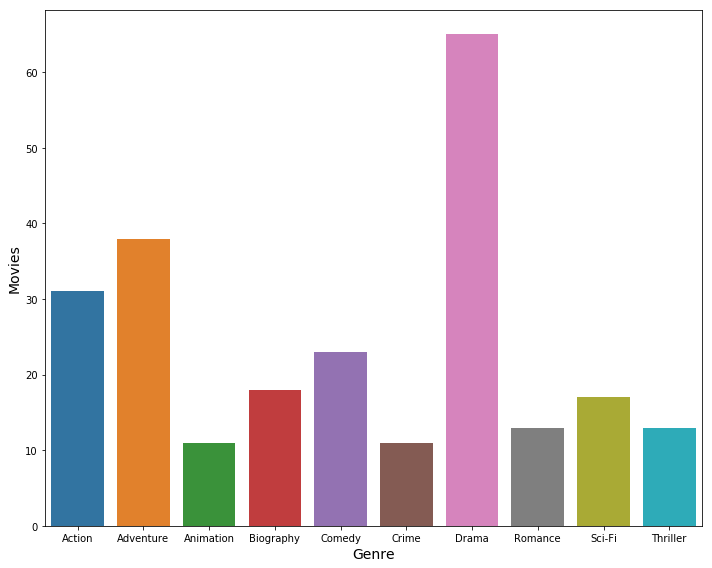

In [49]:
# Countplot for genres

plt.figure(figsize=[10,8])
sns.barplot(data=genre_top10, x=genre_top10.index, y='cnt')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Movies', fontsize=14)
plt.tight_layout()
plt.show()


<span style="color:Blue">**Observation from the above density/histogram plot:**</span>

* Drama is the most included genre in the movies dataset whereas, Animation is the least included. 

**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

-  ###  Subtask 3.3: Gender and Genre

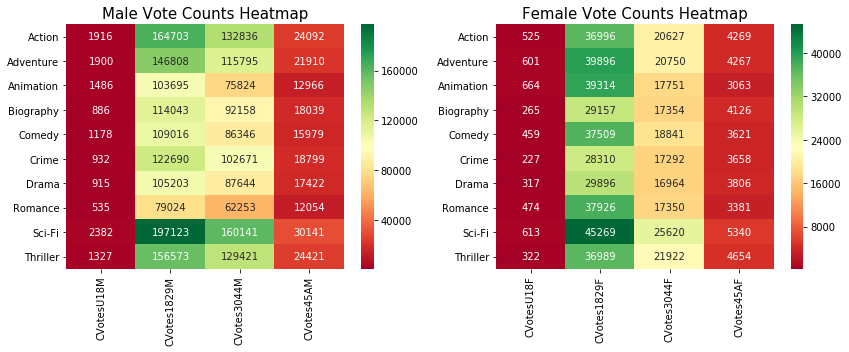

In [50]:
# 1st set of heat maps for CVotes-related columns
plt.figure(figsize=(12,5))

#Creating a subplot for Males Vote counts
plt.subplot(1,2,1)
plt.title('Male Vote Counts Heatmap', fontsize=15)
#Creating a male heatmap using a pivot
sns.heatmap(genre_top10.pivot_table(index=genre_top10.index, aggfunc='mean')[['CVotesU18M','CVotes1829M','CVotes3044M','CVotes45AM']],annot=True, cmap='RdYlGn', fmt='1g')

#Creating a subplot for Female Vote counts
plt.subplot(1,2,2)
plt.title('Female Vote Counts Heatmap', fontsize=15)
#Creating a female heatmap using a pivot
sns.heatmap(genre_top10.pivot_table(index=genre_top10.index, aggfunc='mean')[['CVotesU18F','CVotes1829F','CVotes3044F','CVotes45AF']],annot=True, cmap='RdYlGn', fmt='1g')

#Aligning the heatmaps
plt.tight_layout()
plt.show()


**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- **Inference 1:** The most votes have come from age groups in range 18-44 in both genders.


- **Inference 2:** Romance is the least voted by Males (153886 votes) and Females have voted Crime genre least across all age groups compared to other genres (49,483). 


- **Inference 3:** Males have contibutes more in terms of votes (numbers)


- **Inference 4:** Most voted genre is Sci-fi for both genders specifically in the 18-29 age bracket
- (Though Sci-Fi was not the most included genre in the dataset)


- **Inference 5:** Least voted age groups are under 18 and above 45 for both genders


- **Inference 6**: Females in the age group seem to have voted more for genres like Adventure, Animation, Biography, Comedy, Crime, Drama and Romance than males in the same age group

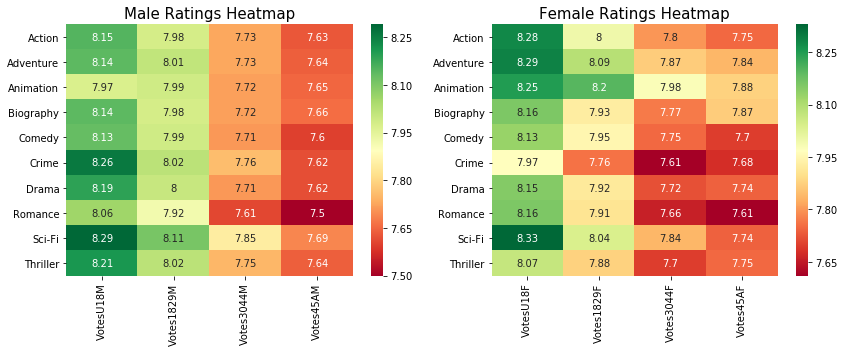

In [51]:
# 2nd set of heat maps for Votes-related columns
plt.figure(figsize=(12,5))

#Creating a subplot for Males Ratings
plt.subplot(1,2,1)
plt.title('Male Ratings Heatmap', fontsize=15)
#Creating a male heatmap using a pivot
sns.heatmap(genre_top10.pivot_table(index=genre_top10.index, aggfunc='mean')[['VotesU18M','Votes1829M','Votes3044M','Votes45AM']],annot=True, cmap='RdYlGn', fmt='1g')
plt.xticks(rotation=90)

#Creating a subplot for Female Ratings
plt.subplot(1,2,2)
plt.title('Female Ratings Heatmap', fontsize=15)
#Creating a female heatmap using a pivot
sns.heatmap(genre_top10.pivot_table(index=genre_top10.index, aggfunc='mean')[['VotesU18F','Votes1829F','Votes3044F','Votes45AF']],annot=True, cmap='RdYlGn', fmt='1g')
plt.xticks(rotation=90)

#Aligning the heatmaps
plt.tight_layout()
plt.show()


**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- **Inference 1:** Irrespective of the gender, least ratings have been given by people in age groups 30-45. As age increases, rating values decreases. 


- **Inference 2:** In general, females have rated more (in terms of a higher avg rating value) than males.


- **Inference 3:** Though Romance was least voted by Males, avg rating given by males for the genre in age bracket 18-29 is prettty good!


- **Inference 4:** There is a slight fall in ratings for all genres by females in age groups 30-44

-  ###  Subtask 3.4: US vs non-US Cross Analysis

In [52]:
# Creating IFUS column

# Storing USA where country is USA and non-USA otherwise
movies_inp["IFUS"]=np.where(movies_inp['Country']=='USA','USA','non-USA')


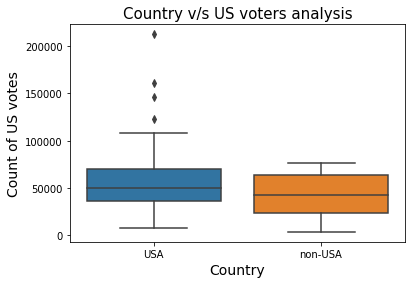

In [53]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

plt.title('Country v/s US voters analysis', fontsize=15)
sns.boxplot(data=movies_inp, x=movies_inp.IFUS, y=movies_inp.CVotesUS)
plt.xlabel('Country', fontsize='14')
plt.ylabel('Count of US votes', fontsize='14')
plt.show()


**`Inferences:`** Write your two inferences/observations below:
- **Inference 1:** Outliers are present for the US Movies


- **Inference 2:** The number of votes for non-US movies is uniformly distributed compared to USA movies


- **Inference 3:** US movies have more votes than non-US movies

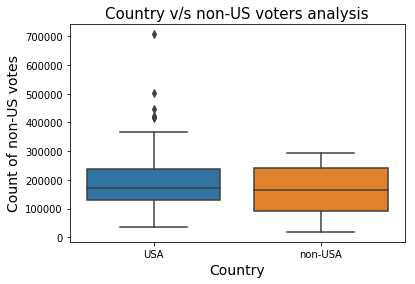

In [54]:
# Box plot - 2: VotesUS(y) vs IFUS(x)

plt.title('Country v/s non-US voters analysis', fontsize=15)
sns.boxplot(data=movies_inp, x=movies_inp.IFUS, y=movies_inp.CVotesnUS)
plt.xlabel('Country', fontsize='14')
plt.ylabel('Count of non-US votes', fontsize='14')
plt.show()


**`Inferences:`** Write your two inferences/observations below:
- **Inference 1:** Non - USA voters voted more in numbers for USA movies.


- **Inference 2:**The number of votes from non - USA people are higher than votes from USA people.

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

In [55]:
# Sorting by CVotes1000

genre_top10.sort_values('CVotes1000', ascending=False, inplace=True)

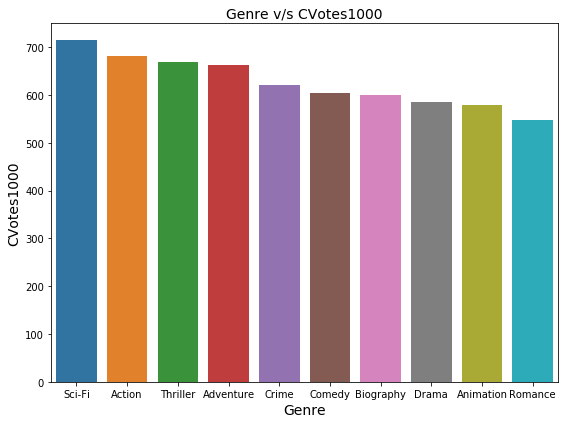

In [56]:
# Bar plot
plt.figure(figsize=(8,6))
plt.title('Genre v/s CVotes1000', fontsize=14)
sns.barplot(data=genre_top10, x=genre_top10.index, y='CVotes1000')
plt.xlabel('Genre',fontsize=14)
plt.ylabel('CVotes1000',fontsize=14)
plt.tight_layout()
plt.show()


**`Inferences:`** Write your inferences/observations here.

- **Inference 1:** The romance genre has been voted the least and Sci-Fi is the most popular Genre.


- **Inference 2:** There is no drastic difference in votes or popularity amongst Action, Thriller and Adventure


**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.

## Summary:


IMBd dataset movie dataset was imported to gain meaningful insights. After defining and understanding the problem statement, data was prepared by inserting required columns, and changing the scale of budget, gross, and ratings making the data more readable. Graphs were plotted to visualize data and gain insights. 


### Insights:

1. Sci-Fi is the most popular among the top 1000 voters across both genders though it is not very much included/oftenly occurred genre in the dataset.

2. Romance is observed to be the least popular across both genders, specifically with respect to Males. 

3. US Movies are voted more in numbers compared to Non-US movies. And US voters strongly voted for US movies more than non-US movies.


4. In terms of vote numbers, Under 18 and above 45 age groups voted least across both genders. 


5. With age, average ratings given by user decreases for both age groups.


6. Majority of the movies have an avg run time of 120 minutes. 


7. The most popular trios/ actors are:

   * Leonardo DiCaprio ,  Tom Hardy ,  Joseph Gordon-Levitt , 
   * Jennifer Lawrence ,  Peter Dinklage ,  Hugh Jackman  ,
   * Tom Hardy ,  Christian Bale ,  Joseph Gordon-Levitt  ,
   * Chris Hemsworth ,  Robert Downey Jr. ,  Scarlett Johansson  ,
   * Robert Downey Jr. ,  Scarlett Johansson ,  Chris Evans   
   
   
8. Budget vs Profit plot indicated a positive upward trend. 


In [57]:
# End of notebook.